In [55]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

pd.set_option('display.max_rows', 500)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv('mouse_drug_data.csv')
trial_data = pd.read_csv('clinicaltrial_data.csv')

# Combine the data into a single dataset
merge_data_df = pd.merge(mouse_drug, trial_data, on="Mouse ID", how="outer")
merge_data_df


# Display the data table for preview
merge_data_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merge_data_df.groupby(['Drug', 'Timepoint']).mean()


# Convert to DataFrame
Mean_df=merge_data_df.groupby(['Drug', 'Timepoint']).mean()
# Preview DataFrame
Mean_df.head()

#rest index so drug name repeats in column
# mean_tumor_volume.reset_index(level='Drug')
# mean_tumor_volume



Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [10]:
#rest index so drug name repeats in column
# tumor_volume_df.reset_index(level='Drug')
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# merge_table_df.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
Tumor_std_error_df=merge_data_df.groupby(["Drug", "Timepoint"]).sem()

# Preview DataFrame
Tumor_std_error_df=pd.DataFrame(Tumor_std_error_df).reset_index().drop(["Metastatic Sites", "Mouse ID"], axis=1)
Tumor_std_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_mean = Mean_df.pivot_table(index='Timepoint', columns='Drug')['Metastatic Sites']



# Preview that Reformatting worked
pivot_table_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# tumor_volume_df.pivot_table(index='Timepoint', columns='Drug',)['Tumor Volume (mm3)']



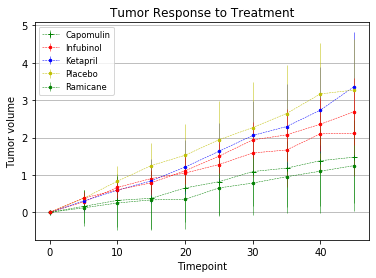

In [82]:
pivot_table_error = Tumor_std_error_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

pivot_table_error.head()

# Generate the Plot (with Error Bars)
plt.errorbar(pivot_table_mean.index, pivot_table_mean["Capomulin"], yerr=pivot_table_error["Capomulin"], color="g", marker="+", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_table_mean.index, pivot_table_mean["Infubinol"], yerr=pivot_table_error["Infubinol"], color="r", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_table_mean.index, pivot_table_mean["Ketapril"], yerr=pivot_table_error["Ketapril"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_table_mean.index, pivot_table_mean["Placebo"], yerr=pivot_table_error["Placebo"], color="y", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_table_mean.index, pivot_table_mean["Ramicane"], yerr=pivot_table_error["Ramicane"], color="g", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_table_mean.index, pivot_table_mean["Ceftamin"], yerr=pivot_table_error["Ceftamin"], color="r", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)


plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo', 'Ramicane'], loc="best", fontsize="small", fancybox=True)


# plt.scatter(merge_data['Timepoint'], merge_data['Tumor Volume (mm3)'])
# plt.scatter(df['Date'].astype('str'), df['Category'], s=df['count'])
plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume")


plt.savefig('Tumor Response')



# plt.show()

# plt.scatter(tumor_volume_df['Timepoint'].astype('str'), combined_data['Tumor Volume (mm3)'])
# plt.scatter(df['Date'].astype('str'), df['Category'], s=df['count'])
# plt.title("Tumor Volume Change Over Time")
# plt.xlabel("Timepoint")
# plt.ylabel("Tumor volume")
# plt.show()

In [ ]:
# Setting up the plot
# x_axis = np.arange(0, len(tumor_volume_df[Timepoint]), 1)
# fig, ax = plt.subplots()

# ax.errorbar(x_axis, columns, fmt="o")

# ax.set_xlim(-1, len(Timepoints) + 1)

# ax.set_xlabel("Sample Number")
# ax.set_ylabel("Proportion of People Voting Republican")

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
merge_data_df.groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
mean_sites = merge_data_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites": "mean"}).reset_index()

# Preview DataFrame
mean_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [22]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_err_merge=merge_data_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites": "sem"})
# Convert to DataFrame

# Preview DataFrame
std_err_merge

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [23]:
# Minor Data Munging to Re-Format the Data Frames
std_err_merge = merge_data_df.pivot_table(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
std_err_merge

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


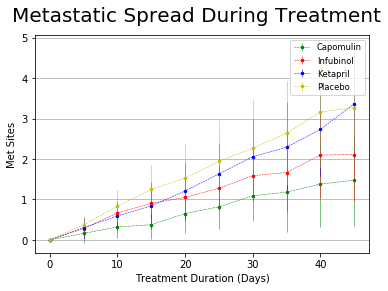

In [39]:
# Generate the Plot (with Error Bars)
fig, ax_1 = plt.subplots()
ax_1.set_xlabel('Treatment Duration (Days)')
ax_1.set_ylabel('Met Sites')

fig.suptitle('Metastatic Spread During Treatment', fontsize=20)

ax_1.errorbar(std_err_merge.index, std_err_merge["Capomulin"], 
            yerr=pivot_table_error["Infubinol"], color="g", marker=".", 
            markersize=5, linestyle="dashed", 
            linewidth=0.50)
ax_1.errorbar(std_err_merge.index, std_err_merge["Infubinol"], yerr=pivot_table_error["Infubinol"], color="r", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
ax_1.errorbar(std_err_merge.index, std_err_merge["Ketapril"], yerr=pivot_table_error["Ketapril"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
ax_1.errorbar(std_err_merge.index, std_err_merge["Placebo"], yerr=pivot_table_error["Placebo"], color="y", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)

ax_1.grid(axis='y')
ax_1.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig('Spread_During_Treatment')



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_ct=merge_data_df.groupby(["Drug", "Timepoint"]).size()

mouse_ct_df=pd.DataFrame(mouse_ct).reset_index()

print(mouse_ct_df)
# Convert to DataFrame

# Preview DataFrame


         Drug  Timepoint   0
0   Capomulin          0  25
1   Capomulin          5  25
2   Capomulin         10  25
3   Capomulin         15  24
4   Capomulin         20  23
5   Capomulin         25  22
6   Capomulin         30  22
7   Capomulin         35  22
8   Capomulin         40  21
9   Capomulin         45  21
10   Ceftamin          0  25
11   Ceftamin          5  21
12   Ceftamin         10  20
13   Ceftamin         15  19
14   Ceftamin         20  18
15   Ceftamin         25  18
16   Ceftamin         30  16
17   Ceftamin         35  14
18   Ceftamin         40  14
19   Ceftamin         45  13
20  Infubinol          0  25
21  Infubinol          5  25
22  Infubinol         10  21
23  Infubinol         15  21
24  Infubinol         20  20
25  Infubinol         25  18
26  Infubinol         30  17
27  Infubinol         35  12
28  Infubinol         40  10
29  Infubinol         45   9
..        ...        ...  ..
70   Ramicane          0  25
71   Ramicane          5  25
72   Ramicane 

In [27]:
# Minor Data Munging to Re-Format the Data Frames
mouse_ct_pivot = mouse_ct_df.pivot_table(index='Timepoint', columns='Drug')

# Preview the Data Frame
mouse_ct_pivot

0                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

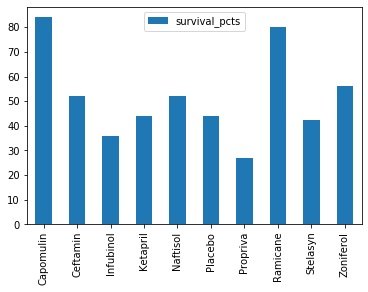

In [79]:
# Generate the Plot (Accounting for percentages)
Capomulin_pct = 21/25 * 100
Ceftamin_pct = 13/25 * 100
Infubinol_pct = 9/25 * 100
Ketapril_pct = 11/25 * 100
Naftisol_pct = 13/25 * 100
Placebo_pct = 11/25 * 100
Propriva_pct = 7/26 * 100
Ramicane_pct = 20/25 * 100
Stelasyn_pct = 11/26 * 100
Zoniferol_pct = 14/25 * 100

survival_pcts = [Capomulin_pct, Ceftamin_pct, Infubinol_pct, Ketapril_pct, Naftisol_pct, Placebo_pct, Propriva_pct, Ramicane_pct, Stelasyn_pct, Zoniferol_pct]
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
index =['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
survival_df = pd.DataFrame({'survival_pcts': survival_pcts,
                   'drugs': drugs}, index=index)
ax = survival_df.plot.bar(rot=0)
plt.xticks(rotation=90)
# Save the Figure

plt.savefig('mice_survival_pcts_bar')


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [48]:
# Calculate the percent changes for each drug
pivot_table_mean
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

pct_changes = (pivot_table_mean[drugs].iloc[-1]/pivot_table_mean[drugs].iloc[0]-1)
# Display the data to confirm


In [78]:
Mean_df
#caluclated the % tumor changed for the best 4 drugs (best = smallest tumor sizes at 45 days)
Cap_tumor_change = 36.236114/45 * 100
Cef_tumor_change = 64.132421/45 * 100
Inf_tumor_change = 65.755562/45 * 100
Ram_tumor_change = 34.955595/45 * 100
print(Cap_tumor_change, Cef_tumor_change, Inf_tumor_change, Ram_tumor_change)


80.52469777777777 142.5164911111111 146.12347111111112 77.6791


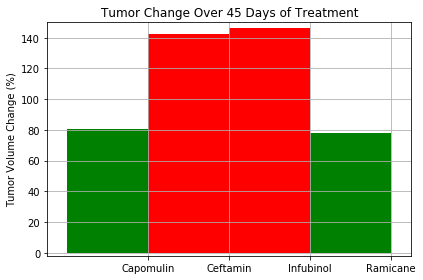

In [74]:
# Store all Relevant Percent Changes into a Tuple
best_drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
best_pct_change = [80.52469777777778, 142.51649111111109, 146.1234711111111, 77.6791]

# Splice the data between passing and failing drugs
x_axis = np.arange(len(best_pct_change))

# Orient widths. Add labels, tick marks, etc. 
plt.bar(x_axis, best_pct_change, width=1, color=("g","r","r","g"), align="edge", label="best_pct_change")
tick_locations = [value for value in x_axis + 1]
plt.xticks(tick_locations, best_drugs)

plt.title("Tumor Change Over 45 Days of Treatment")
plt.ylabel("Tumor Volume Change (%)")

plt.xlim(-.25, 4.25)
plt.ylim(-2, 150)

plt.grid(axis="both")

plt.tight_layout()

# Use functions to label the percentages of changes ?can't figure this out!


# Call functions to implement the function calls


# Save the Figure
plt.savefig('mice_survival_pcts')

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)